# Orthogonal Projection
## (Project a 3D object on a 2D plane in different angle)

1 Step: Plane Rotation

Input a, b, c ,d index accordingly base on plane equation ax+by+cz=d


a:  23
b:  2
c:  3
d:  4
Please input the rotation degree on x axis:  23
Please input the rotation degree on y axis:  32
Please input the rotation degree on z axis:  32


-------------------------------------------------------------------------------------------------------------
Plane equation: 23x+2y+3z=4 
Rotation on x axis= 23, Rotation on y axis= 32, Rotation on z axis= 32 
Normal vector before rotation: 
 [[23]
 [ 2]
 [ 3]]
Normal vector after rotation: 
 [[14.05271635]
 [ 7.9672308 ]
 [16.7643788 ]]
Reference point after rotation: 
 [-0.39743945 -0.24851909  0.58547429]
basis that span original plane: 
[0.         3.32820118 2.21880078], [-0.24073682 -2.21477874  3.32216811]
basis that span rotated plane: 
[0.         3.61276326 1.71695707], [-2.56215474 -1.31849581  2.77433449]


C:\Users\USER\AppData\Local\Temp\ipykernel_13880\103448391.py:146: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  d_prime=float(Rotated_Ref[0]*a_prime+Rotated_Ref[1]*b_prime+Rotated_Ref[2]*c_prime)
C:\Users\USER\AppData\Local\Temp\ipykernel_13880\103448391.py:147: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  a_prime=float(a_prime)
C:\Users\USER\AppData\Local\Temp\ipykernel_13880\103448391.py:148: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  b_prime=float(b_prime)


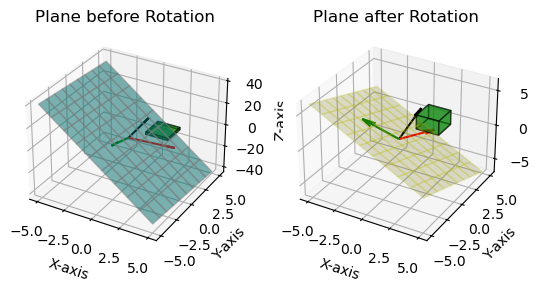

In [435]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from sympy import symbols, latex

#Rotation x
def R_x(alpha):
    alpha=np.radians(alpha)
    return(np.array([
        [1,0,0],
        [0,np.cos(alpha),-np.sin(alpha)],
        [0,np.sin(alpha),np.cos(alpha)]
    ]))

#Rotation y
def R_y(beta):
    beta=np.radians(beta)
    return(np.array([
        [np.cos(beta),0,-np.sin(beta)],
        [0,1,0],
        [np.sin(beta),0,np.cos(beta)]
    ]))

#Rotation z
def R_z(gamma):
    gamma=np.radians(gamma)
    return(np.array([
        [np.cos(gamma),-np.sin(gamma),0],
        [np.sin(gamma),np.cos(gamma),0],
        [0,0,1]
    ]))

#Rotation x,y,z combine
def R(alpha,beta,gamma):
    return R_x(alpha) @ R_y(beta) @ R_z(gamma)

#Projection Matrix
def Projection(A,x):
    return A@(np.linalg.inv(A.T@A))@(A.T)@x

#
def find_plane_basis(n):
    """Finds two basis vectors that span the plane ax + by + cz = d."""
    n = np.asarray(n, dtype=float).ravel()  # Ensure n is a 1D array

    if n[2] != 0:
        tem1 = (n[0]) / n[2]
        tem2 = (n[1]) / n[2]
    else:
        tem1, tem2 = 0, 0  # Prevent division by zero

    # Choose an arbitrary vector not parallel to n
    if abs(n[0]) < abs(n[1]):
        if n[2] != 0:
            v1 = np.array([1, 0, tem1])
        else:
            v1 = np.array([0, 1, 0])
    else:
        if n[2] != 0:
            v1 = np.array([0, 1, tem2])
        else:
            v1 = np.array([1, 0, 0])
    v1/=np.linalg.norm(v1)
    v1*=4
    v2 = np.cross(n, v1)      # Compute second basis vector
    v2/=np.linalg.norm(v2)
    v2*=4
    return v1, v2


#Find reference point
def find_reference_point(a,b,c,d):
    if d!=0:
        if c!=0:
            refpoint=np.array([0,0,c/d])
        elif b!=0:
            refpoint=np.array([0,b/d,0])
        elif a!=0:
            refpoint=np.array([a/d,0,0])
    else:
        refpoint=np.array([0,0,0])

    return refpoint

#Get Value
print("Input a, b, c ,d index accordingly base on plane equation ax+by+cz=d")
a=int(input("a: "))
b=int(input("b: "))
c=int(input("c: "))
d=int(input("d: "))
alpha=int(input("Please input the rotation degree on x axis: "))
beta=int(input("Please input the rotation degree on y axis: "))
gamma=int(input("Please input the rotation degree on z axis: "))


#Take normal vector (a,b,c) of the plane
norm=np.array([
    [a],
    [b],
    [c]
])
#Get reference point
refpoint=find_reference_point(a,b,c,d)

#Rotate the normal vector
Rotated=R(alpha,beta,gamma)@norm
Rotated_Ref=R(alpha,beta,gamma) @ refpoint
print("-------------------------------------------------------------------------------------------------------------")
print(f"Plane equation: {a}x+{b}y+{c}z={d} ")
print(f"Rotation on x axis= {alpha}, Rotation on y axis= {beta}, Rotation on z axis= {gamma} ")
print("Normal vector before rotation: \n",norm)
print("Normal vector after rotation: \n",Rotated)
if d!=0:
    print("Reference point after rotation: \n",Rotated_Ref)




#### Plotting
x = np.linspace(-5, 5, 10)
y = np.linspace(-5, 5, 10)
X, Y = np.meshgrid(x, y)

#Cube plot Preparation
face_edge=np.array([
    [1,1,1],[3,1,1],[3,3,1],[1,3,1],
    [1,1,3],[3,1,3],[3,3,3],[1,3,3]
])

face_connection=[
    [0,1,2,3],
    [4,5,6,7],
    [0,1,5,4],
    [1,2,6,5],
    [2,3,7,6],
    [3,0,4,7]
]

cube=[[face_edge[i] for i in faces] for faces in face_connection]

#Extract value from rotated matrix
a_prime=Rotated[0]
b_prime=Rotated[1]
c_prime=Rotated[2]
d_prime=float(Rotated_Ref[0]*a_prime+Rotated_Ref[1]*b_prime+Rotated_Ref[2]*c_prime)
a_prime=float(a_prime)
b_prime=float(b_prime)
c_prime=float(c_prime)

# Define the plane equation: ax + by + cz + d = 0
Z = (-a * X - b * Y - d) / c  # Solve for Z
Z_prime=(-a_prime*X-b_prime*Y-d_prime)/c_prime #Solve for Rotated Plane

#Define original normal vector
x0,y0=0,0
z0=(-a_prime*x0-b_prime*y0-d_prime)/c_prime

#Get the basis vector of norm
n_basiss=norm/np.linalg.norm(norm)
u1,u2,u3=4*n_basiss[0], 4*n_basiss[1],4*n_basiss[2]


#plane before rotate figure
fig = plt.figure()
ax = fig.add_subplot(121, projection='3d')

#Plot surface and cube
ax.add_collection3d(Poly3DCollection(cube,color="green", alpha=0.5, edgecolor="k"))
ax.plot_surface(X, Y, Z, alpha=0.5, color='cyan', edgecolor='gray') # Plot original plane

before_basis1, before_basis2=find_plane_basis(norm)
print(f"basis that span original plane: \n{before_basis1}, {before_basis2}")
p_0before=find_reference_point(a,b,c,d)
before_basis1=before_basis1
before_basis2=before_basis2
ax.quiver(x0,y0,z0,before_basis1[0],before_basis1[1],before_basis1[2], color='k', linewidth=1.5)
ax.quiver(x0,y0,z0,before_basis2[0],before_basis2[1],before_basis2[2], color='g', linewidth=1.5)


#Find projection of cube on plane
#Using basis
before_basis_vector=np.column_stack((before_basis1,before_basis2))
x_vector=face_edge.T
before_projection_vectors=Projection(before_basis_vector,x_vector)
before_pv_in_col=[before_projection_vectors[: ,i] for i in range(before_projection_vectors.shape[1])]

#Plot vector
ax.quiver(x0,y0,z0,u1,u2,u3, color='r', linewidth=1.5)

ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")
ax.set_title("Plane before Rotation")



#plot another graph
ax=fig.add_subplot(122,projection='3d')
ax.add_collection3d(Poly3DCollection(cube,color="green", alpha=0.5, edgecolor="k"))
ax.plot_surface(X,Y,Z_prime, alpha=0.2, color='y', edgecolor='y') #Plot Rotated plane


#Define rotated normal vector
#Normalize normal vector
norm_prime=np.array([
    [a_prime],
    [b_prime],
    [c_prime]
])
norm_prime_basiss=norm_prime/np.linalg.norm(norm_prime)

vv1,vv2,vv3 = 4*norm_prime_basiss[0],4*norm_prime_basiss[1],4*norm_prime_basiss[1]
ax.quiver(x0,y0,z0,vv1,vv2,vv3, color='r', linewidth=1.5)


#define 2 basis that span rotated plane
basis1, basis2=find_plane_basis(Rotated)
print(f"basis that span rotated plane: \n{basis1}, {basis2}")
p0=find_reference_point(a_prime,b_prime,c_prime,d_prime)
basis1=basis1
basis2=basis2
ax.quiver(x0,y0,z0,basis1[0],basis1[1],basis1[2], color='k', linewidth=1.5)
ax.quiver(x0,y0,z0,basis2[0],basis2[1],basis2[2], color='g', linewidth=1.5)

ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")
ax.set_title("Plane after Rotation")

#Find projection of cube on plane
#Using basis
basis_vector=np.column_stack((basis1,basis2))
x_vector=face_edge.T
projection_vectors=Projection(basis_vector,x_vector)
pv_in_col=[projection_vectors[: ,i] for i in range(projection_vectors.shape[1])]

plt.show()


2nd: Projection

Make sure run the code again after previous value being changed

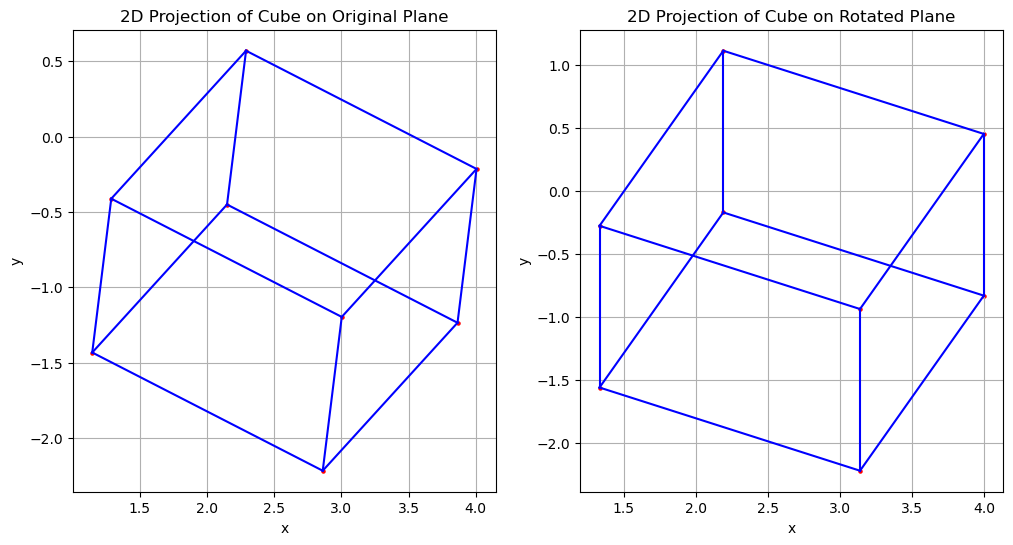

In [437]:
fig = plt.figure(figsize=(12,6))
ax1=fig.add_subplot(121)

before_basis1_unit = before_basis1 / np.linalg.norm(before_basis1)  # Normalize basis1
before_basis2_unit = before_basis2 / np.linalg.norm(before_basis2)  # Normalize basis2

before_proj_2D_x = [np.dot(pv, before_basis1_unit) for pv in pv_in_col]
before_proj_2D_y = [np.dot(pv, before_basis2_unit) for pv in pv_in_col]

# Plot projected cube points
ax1.scatter(before_proj_2D_x, before_proj_2D_y, color='red', s=5)

# Connect points to form cube edges in 2D
edges_2D = [
    (0,1), (1,2), (2,3), (3,0),  # Bottom face
    (4,5), (5,6), (6,7), (7,4),  # Top face
    (0,4), (1,5), (2,6), (3,7)   # Vertical edges
]

for i, j in edges_2D:
    ax1.plot([before_proj_2D_x[i], before_proj_2D_x[j]], [before_proj_2D_y[i], before_proj_2D_y[j]], 'b-')


# Label and display
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_title("2D Projection of Cube on Original Plane")
ax1.grid(True)

ax2= fig.add_subplot(122)

basis1_unit = basis1 / np.linalg.norm(basis1)  # Normalize basis1
basis2_unit = basis2 / np.linalg.norm(basis2)  # Normalize basis2

proj_2D_x = [np.dot(pv, basis1_unit) for pv in pv_in_col]
proj_2D_y = [np.dot(pv, basis2_unit) for pv in pv_in_col]

# Plot projected cube points
ax2.scatter(proj_2D_x, proj_2D_y, color='red', s=5)

# Connect points to form cube edges in 2D

for i, j in edges_2D:
    ax2.plot([proj_2D_x[i], proj_2D_x[j]], [proj_2D_y[i], proj_2D_y[j]], 'b-')

# Label and display
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_title("2D Projection of Cube on Rotated Plane")
ax2.grid(True)

plt.show()